In [33]:
# Some standard code imports
import matplotlib.pyplot as plt
import matplotlib

import matplotlib.axes as axes
import numpy as np

# For drawing graphs
import networkx as nx

from qiskit.quantum_info import SparsePauliOp
from docplex.mp.model import Model
from qiskit import transpile, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_optimization.translators import from_docplex_mp
from qiskit.circuit.library import QAOAAnsatz
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from scipy.optimize import minimize


# auxilliary function to plot graphs
def plot_result(G, x):
    colors = ['r' if x[i] == 0 else 'b' for i in range(n)]
    pos, default_axes = nx.spring_layout(G), plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, pos=pos)

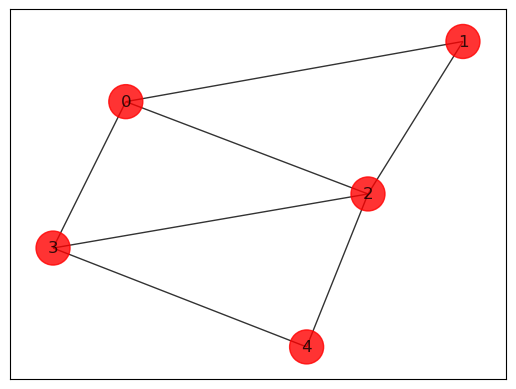

In [2]:
# Create graph
G = nx.Graph()

# Add 5 nodes
n = 5
G.add_nodes_from(range(n))

# Add edges: tuple is (i,j,weight) where (i,j) is the edge
edges = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0), (2, 4, 1.0), (3, 4, 1.0)]
G.add_weighted_edges_from(edges)

# Plot graph
plot_result(G, [0]*n)
NoWeight = False

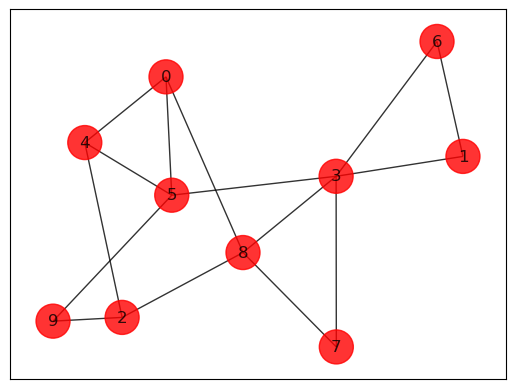

In [72]:
n = 10
G = nx.erdos_renyi_graph(n, 0.3)
edges = G.edges
NoWeight = True
plot_result(G, [0]*n)

In [73]:
# Name the model
mdl = Model('MaxCut')

# Add a binary variable to the model for each node in the graph
x = mdl.binary_var_list('x{}'.format(i) for i in range(n))

# Define the objective function
if NoWeight:
    objective = mdl.sum([ (x[i] + x[j] - 2*x[i]*x[j]) for (i, j) in edges])
else:
    objective = mdl.sum([ w * (x[i] + x[j] - 2*x[i]*x[j]) for (i, j, w) in edges])

# Add an equality constraint
b = 2
mdl.add_constraint(mdl.sum(x) == b)

# And let's maximize it!
mdl.maximize(objective)

# Let's print the model
mdl.prettyprint()

// This file has been generated by DOcplex
// model name is: MaxCut
// var contrainer section
dvar bool x[10];

maximize
 3 x0 + 2 x1 + 3 x2 + 5 x3 + 3 x4 + 4 x5 + 2 x6 + 2 x7 + 4 x8 + 2 x9 [
 - 2 x0*x4 - 2 x0*x5 - 2 x0*x8 - 2 x1*x3 - 2 x1*x6 - 2 x2*x4 - 2 x2*x8
 - 2 x2*x9 - 2 x3*x5 - 2 x3*x6 - 2 x3*x7 - 2 x3*x8 - 2 x4*x5 - 2 x5*x9
 - 2 x7*x8 ];
 
subject to {
 x0 + x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 == 2;

}


In [74]:
# Instantiate an empty QuadraticProgram object
qp = QuadraticProgram()

# Put the model inside it

qp = from_docplex_mp(mdl)

print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: MaxCut

Maximize
 obj: 3 x0 + 2 x1 + 3 x2 + 5 x3 + 3 x4 + 4 x5 + 2 x6 + 2 x7 + 4 x8 + 2 x9 + [
      - 4 x0*x4 - 4 x0*x5 - 4 x0*x8 - 4 x1*x3 - 4 x1*x6 - 4 x2*x4 - 4 x2*x8
      - 4 x2*x9 - 4 x3*x5 - 4 x3*x6 - 4 x3*x7 - 4 x3*x8 - 4 x4*x5 - 4 x5*x9
      - 4 x7*x8 ]/2
Subject To
 c0: x0 + x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 = 2

Bounds
 0 <= x0 <= 1
 0 <= x1 <= 1
 0 <= x2 <= 1
 0 <= x3 <= 1
 0 <= x4 <= 1
 0 <= x5 <= 1
 0 <= x6 <= 1
 0 <= x7 <= 1
 0 <= x8 <= 1
 0 <= x9 <= 1

Binaries
 x0 x1 x2 x3 x4 x5 x6 x7 x8 x9
End



In [124]:
qp = QuadraticProgramToQubo(penalty=10).convert(qp)

# Let's print the model!
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: MaxCut

Minimize
 obj: - 43 x0 - 42 x1 - 43 x2 - 45 x3 - 43 x4 - 44 x5 - 42 x6 - 42 x7 - 44 x8
      - 42 x9 + [ 20 x0^2 + 40 x0*x1 + 40 x0*x2 + 40 x0*x3 + 44 x0*x4 + 44 x0*x5
      + 40 x0*x6 + 40 x0*x7 + 44 x0*x8 + 40 x0*x9 + 20 x1^2 + 40 x1*x2
      + 44 x1*x3 + 40 x1*x4 + 40 x1*x5 + 44 x1*x6 + 40 x1*x7 + 40 x1*x8
      + 40 x1*x9 + 20 x2^2 + 40 x2*x3 + 44 x2*x4 + 40 x2*x5 + 40 x2*x6
      + 40 x2*x7 + 44 x2*x8 + 44 x2*x9 + 20 x3^2 + 40 x3*x4 + 44 x3*x5
      + 44 x3*x6 + 44 x3*x7 + 44 x3*x8 + 40 x3*x9 + 20 x4^2 + 44 x4*x5
      + 40 x4*x6 + 40 x4*x7 + 40 x4*x8 + 40 x4*x9 + 20 x5^2 + 40 x5*x6
      + 40 x5*x7 + 40 x5*x8 + 44 x5*x9 + 20 x6^2 + 40 x6*x7 + 40 x6*x8
      + 40 x6*x9 + 20 x7^2 + 44 x7*x8 + 40 x7*x9 + 20 x8^2 + 40 x8*x9 + 20 x9^2
      ]/2 + 40
Subject To

Bounds
 0 <= x0 <= 1
 0 <= x1 <= 1
 0 <= x2 <= 1
 0 <= x3 <= 1
 0 <= x4 <= 1
 0 <= x5 <= 1
 0 <= x6 <= 1
 0 <= x7 <= 1
 0 <= x8 <= 1
 0 <= x

In [125]:
def build_max_cut_paulis(graph) -> list[tuple[str, float]]:
    """Convert the graph to Pauli list.

    This function does the inverse of `build_max_cut_graph`
    """
    pauli_list = []
    for edge in graph.edges:
        paulis = ["I"] * len(graph)
        paulis[edge[0]], paulis[edge[1]] = "Z", "Z"

        if NoWeight:
            weight =1
        else:
            weight = graph.get_edge_data(edge[0], edge[1])['weight']

        pauli_list.append(("".join(paulis)[::-1], weight))

    return pauli_list


max_cut_paulis = build_max_cut_paulis(G)

cost_hamiltonian = SparsePauliOp.from_list(max_cut_paulis)
print("Cost Function Hamiltonian:", cost_hamiltonian)

Cost Function Hamiltonian: SparsePauliOp(['IIIIIZIIIZ', 'IIIIZIIIIZ', 'IZIIIIIIIZ', 'IIIIIIZIZI', 'IIIZIIIIZI', 'IIIIIZIZII', 'IZIIIIIZII', 'ZIIIIIIZII', 'IIIIZIZIII', 'IIIZIIZIII', 'IIZIIIZIII', 'IZIIIIZIII', 'IIIIZZIIII', 'ZIIIZIIIII', 'IZZIIIIIII'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j,
 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])


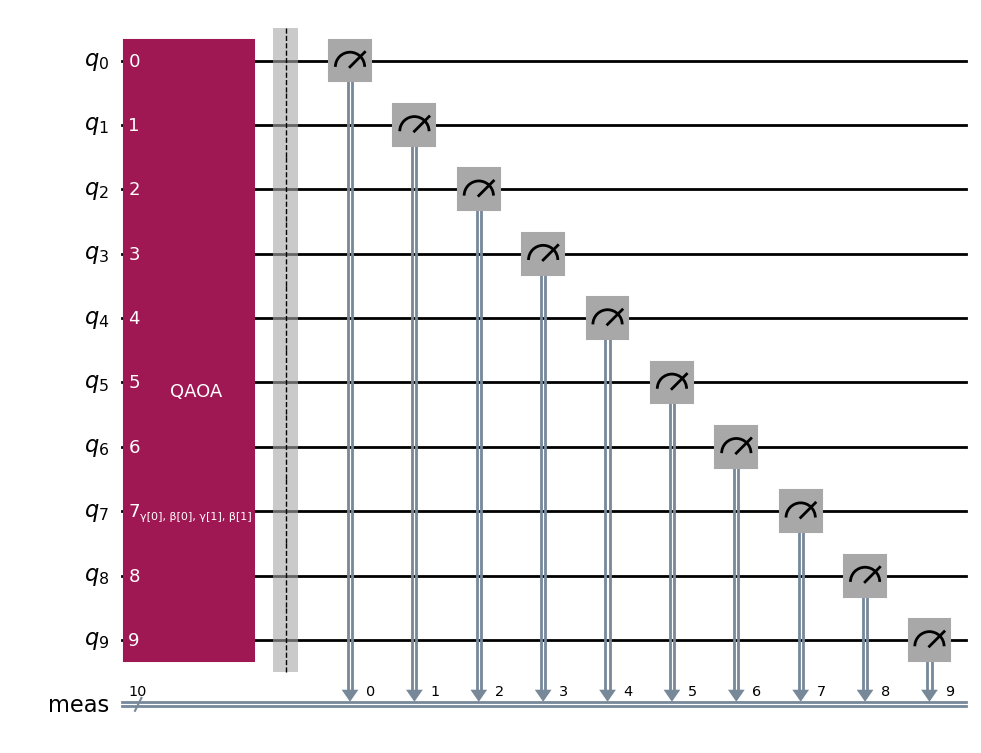

In [126]:
circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=2)
circuit.measure_all()

circuit.draw('mpl')

In [59]:
circuit.parameters

ParameterView([ParameterVectorElement(β[0]), ParameterVectorElement(β[1]), ParameterVectorElement(γ[0]), ParameterVectorElement(γ[1])])

In [127]:
backend = AerSimulator()
candidate_circuit = transpile(circuit, backend)

initial_gamma = np.pi
initial_beta = np.pi/2
init_params = [initial_gamma, initial_beta, initial_gamma, initial_beta]

In [128]:
def cost_func_estimator(params, ansatz, hamiltonian, estimator):

    # transform the observable defined on virtual qubits to
    # an observable defined on all physical qubits
    isa_hamiltonian = hamiltonian.apply_layout(ansatz.layout)

    pub = (ansatz, isa_hamiltonian, params)
    job = estimator.run([pub])

    results = job.result()[0]
    cost = results.data.evs

    objective_func_vals.append(cost)


    return cost

In [138]:
estimator = Estimator(backend)
estimator.options.default_shots = 1000

objective_func_vals = [] # Global variable
result = minimize(
        cost_func_estimator,
        init_params,
        args=(candidate_circuit, cost_hamiltonian, estimator),
        method="COBYLA",
        tol=1e-2,
    )
print(result)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -4.68031968031968
       x: [ 4.336e+00  3.151e+00  3.435e+00  1.046e+00]
    nfev: 33
   maxcv: 0.0


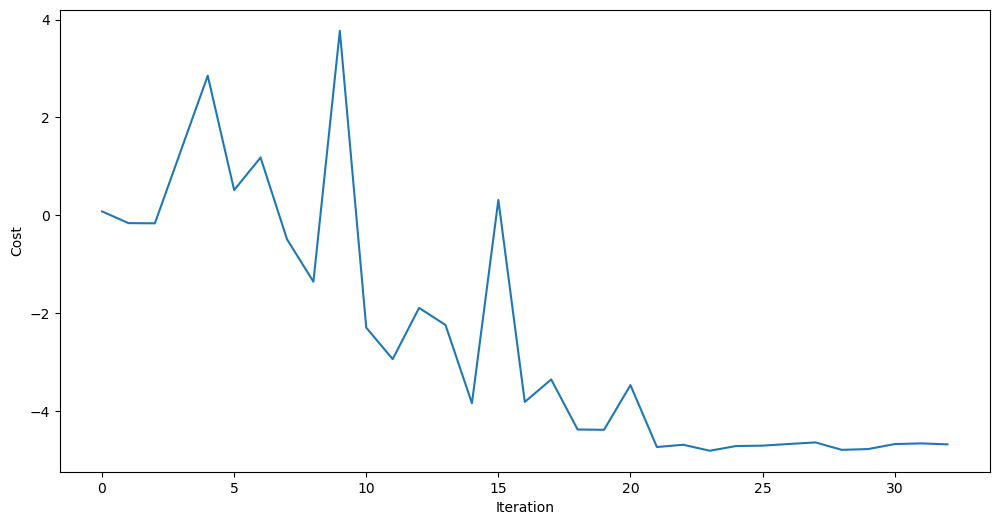

In [139]:
plt.figure(figsize=(12, 6))
plt.plot(objective_func_vals)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [143]:
optimized_circuit = candidate_circuit.assign_parameters(result.x)

sampler = Sampler(backend)
sampler.options.default_shots = 10000
pub= (optimized_circuit, )
job = sampler.run([pub], shots=int(1e4))
counts_int = job.result()[0].data.meas.get_int_counts()
counts_bin = job.result()[0].data.meas.get_counts()
shots = sum(counts_int.values())
final_distribution_int = {key: val/shots for key, val in counts_int.items()}
final_distribution_bin = {key: val/shots for key, val in counts_bin.items()}
print(final_distribution_int)

{156: 0.0016, 856: 0.0137, 780: 0.0014, 356: 0.0084, 215: 0.0034, 422: 0.0054, 357: 0.0033, 314: 0.0039, 870: 0.0012, 294: 0.0084, 498: 0.0042, 231: 0.0141, 527: 0.0069, 368: 0.0067, 284: 0.0015, 793: 0.0039, 794: 0.0146, 880: 0.007, 792: 0.0135, 665: 0.0054, 620: 0.0007, 380: 0.0018, 483: 0.0019, 271: 0.0015, 434: 0.0073, 737: 0.0034, 711: 0.005, 541: 0.001, 269: 0.0023, 174: 0.0016, 211: 0.0005, 712: 0.0001, 601: 0.006, 976: 0.0071, 328: 0.0007, 993: 0.0016, 1010: 0.005, 355: 0.0018, 98: 0.0003, 850: 0.0055, 837: 0.0017, 779: 0.0054, 741: 0.002, 282: 0.0029, 120: 0.001, 152: 0.0006, 167: 0.0129, 108: 0.0034, 246: 0.0041, 109: 0.0067, 352: 0.0038, 44: 0.0031, 141: 0.0044, 216: 0.0006, 930: 0.0039, 101: 0.0011, 164: 0.0009, 159: 0.0033, 802: 0.0039, 961: 0.0011, 188: 0.0019, 318: 0.0016, 787: 0.0027, 992: 0.0045, 743: 0.0034, 225: 0.0005, 617: 0.001, 190: 0.0014, 460: 0.0003, 182: 0.0043, 784: 0.0013, 978: 0.0068, 659: 0.0035, 777: 0.0039, 31: 0.0039, 727: 0.0026, 184: 0.0023, 306: 0.0

In [144]:
# auxiliary functions to sample most likely bitstring
def to_bitstring(integer, num_bits):
    result = np.binary_repr(integer, width=num_bits)
    return [int(digit) for digit in result]

keys = list(final_distribution_int.keys())
values = list(final_distribution_int.values())
most_likely = keys[np.argmax(np.abs(values))]
most_likely_bitstring = to_bitstring(most_likely, len(G))
most_likely_bitstring.reverse()

print("Result bitstring:", most_likely_bitstring)

Result bitstring: [0, 1, 0, 1, 1, 0, 0, 0, 1, 1]


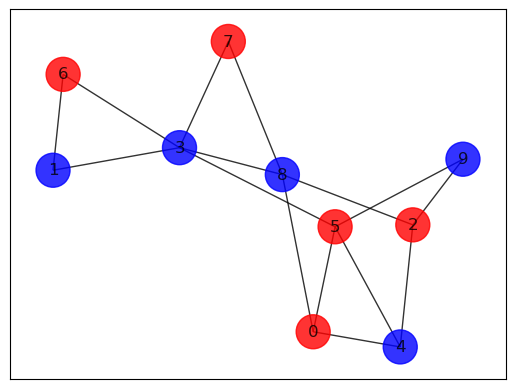

In [145]:
plot_result(G,most_likely_bitstring)